In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Importing the dataset
dataset = pd.read_csv('Data/Train.csv')

In [3]:
dataset = pd.get_dummies(data=dataset, columns = ['Churn'])

In [4]:
dataset

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Churn_No,Churn_Yes
0,0.024537,0.029759,0.068966,0.001568,0.000000,0.000000,0.410058,0.303158,0.003157,0.002156,...,0,1,0,0,0,1,0,0,0,1
1,0.018836,0.001359,0.056650,0.000000,0.000000,0.000000,0.426933,0.308448,0.001353,0.000000,...,0,1,0,0,0,0,0,1,0,1
2,0.035924,0.001087,0.108374,0.000000,0.000000,0.000000,0.427153,0.308448,0.000000,0.000000,...,0,0,0,0,0,0,0,1,1,0
3,0.071937,0.178285,0.199507,0.007780,0.000000,0.000000,0.444690,0.310704,0.234551,0.023714,...,1,0,0,0,0,1,0,0,1,0
4,0.018958,0.000000,0.056650,0.000000,0.000000,0.000000,0.427374,0.308393,0.000000,0.000000,...,0,1,0,0,0,0,0,1,0,1
5,0.035964,0.092676,0.142857,0.001568,0.000000,0.000000,0.443697,0.307585,0.040595,0.005236,...,1,0,0,0,0,0,0,1,1,0
6,0.030767,0.003533,0.088670,0.001568,0.000000,0.000000,0.433991,0.309562,0.000000,0.003080,...,0,0,0,1,0,0,0,1,1,0
7,0.055549,0.013317,0.177340,0.015559,0.000000,0.000000,0.430021,0.310342,0.000000,0.000924,...,0,1,0,0,0,1,0,0,1,0
8,0.033728,0.003261,0.100985,0.000000,0.000000,0.000000,0.429580,0.308365,0.000000,0.000000,...,1,0,0,0,0,0,0,1,1,0
9,0.070896,0.143498,0.199507,0.000000,0.000000,0.000000,0.432116,0.309117,0.000000,0.000000,...,0,1,0,0,0,1,0,0,1,0


In [5]:
X = dataset.iloc[:,:].values

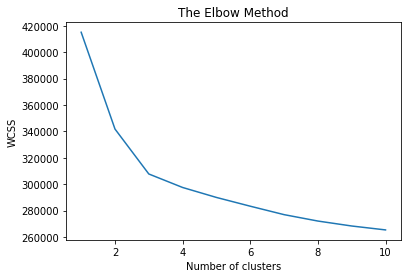

In [6]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 23, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

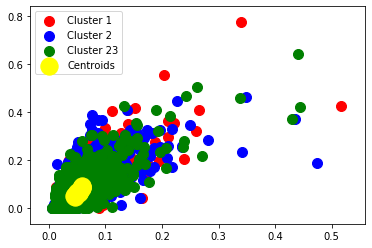

In [8]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 23')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
plt.legend()
plt.show()